In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [2]:
df = data.movies()

In [3]:
columns_of_interest = ["Title", "US_Gross", "Worldwide_Gross", "Release_Date", "Major_Genre",
                       "MPAA_Rating", "Rotten_Tomatoes_Rating", "IMDB_Rating"]

In [4]:
# Convert string dates to `datetime`
df["Release_Date"] = pd.to_datetime(df["Release_Date"], format="%b %d %Y")

# Fix invalid dates that are in wrong century
df.loc[df["Release_Date"] > "2012", "Release_Date"] -= pd.DateOffset(years=100)

# Having just the year separated from the full data will make charting and querying easier
df["Release_Year"] = df["Release_Date"].dt.year

In [5]:
df.columns

Index(['Title', 'US_Gross', 'Worldwide_Gross', 'US_DVD_Sales',
       'Production_Budget', 'Release_Date', 'MPAA_Rating', 'Running_Time_min',
       'Distributor', 'Source', 'Major_Genre', 'Creative_Type', 'Director',
       'Rotten_Tomatoes_Rating', 'IMDB_Rating', 'IMDB_Votes', 'Release_Year'],
      dtype='object')

In [6]:
df = df[columns_of_interest].dropna()
df["year"] = df.Release_Date.apply(lambda x: x.year)

In [7]:
df.head()

,Title,US_Gross,Worldwide_Gross,Release_Date,Major_Genre,MPAA_Rating,Rotten_Tomatoes_Rating,IMDB_Rating,year
4,Slam,1009819.0,1087521.0,1998-10-09,Drama,R,62.0,3.4,1998
21,1776,0.0,0.0,1972-11-09,Drama,PG,57.0,7.0,1972
28,Twin Falls Idaho,985341.0,1027228.0,1999-07-30,Drama,R,77.0,7.1,1999
31,3 Ninjas Kick Back,11744960.0,11744960.0,1994-05-06,Action,PG,17.0,3.2,1994
34,Four Rooms,4301000.0,4301000.0,1995-12-25,Comedy,R,14.0,6.4,1995


In [8]:
df.describe()

,US_Gross,Worldwide_Gross,Rotten_Tomatoes_Rating,IMDB_Rating,year
count,1.841000e+03,1.841000e+03,1841.000000,1841.000000,1841.000000
mean,5.354270e+07,1.055725e+08,50.579033,6.214503,2001.737099
std,6.680011e+07,1.658126e+08,27.306481,1.218165,5.838718
min,0.000000e+00,0.000000e+00,1.000000,1.600000,1939.000000
25%,1.218951e+07,1.511880e+07,27.000000,5.500000,1999.000000
50%,3.205192e+07,4.617632e+07,50.000000,6.300000,2002.000000
75%,6.782357e+07,1.284029e+08,75.000000,7.100000,2006.000000
max,7.601676e+08,2.767891e+09,100.000000,9.200000,2010.000000


### Filter data as per user request

In [9]:
genre = ["Drama", "Comedy"]
MPAA = ["R", "PG"]
year_min = 1980
year_max = 2010
release = list(range(year_min, year_max+1))

In [10]:
q = "Major_Genre in @genre & MPAA_Rating in @MPAA & year in @release"
df1 = df.copy().query(q)
df1.head()

,Title,US_Gross,Worldwide_Gross,Release_Date,Major_Genre,MPAA_Rating,Rotten_Tomatoes_Rating,IMDB_Rating,year
4,Slam,1009819.0,1087521.0,1998-10-09,Drama,R,62.0,3.4,1998
28,Twin Falls Idaho,985341.0,1027228.0,1999-07-30,Drama,R,77.0,7.1,1999
34,Four Rooms,4301000.0,4301000.0,1995-12-25,Comedy,R,14.0,6.4,1995
73,Baby's Day Out,16581575.0,16581575.0,1994-07-01,Comedy,PG,21.0,5.0,1994
88,Before Sunrise,5274005.0,5274005.0,1995-01-27,Drama,R,100.0,8.0,1995


## Get top 20 grossing movies

In [11]:
top_us_gross_df = df1.sort_values("US_Gross", ascending=False)
top_10 = top_us_gross_df.head(10).reset_index().drop(columns="index")
top_10["rank"] = top_10.index + 1
top_10

,Title,US_Gross,Worldwide_Gross,Release_Date,Major_Genre,MPAA_Rating,Rotten_Tomatoes_Rating,IMDB_Rating,year,rank
0,The Passion of the Christ,370782930.0,611899420.0,2004-02-25,Drama,R,50.0,7.1,2004,1
1,Home Alone,285761243.0,476684675.0,1990-11-16,Comedy,PG,47.0,7.0,1990,2
2,The Hangover,277322503.0,465132119.0,2009-06-05,Comedy,R,78.0,7.9,2009,3
3,How the Grinch Stole Christmas,260044825.0,345141403.0,2000-11-17,Comedy,PG,53.0,5.7,2000,4
4,Night at the Museum,250863268.0,574480841.0,2006-12-22,Comedy,PG,43.0,6.4,2006,5
5,Despicable Me,244885070.0,333572855.0,2010-07-09,Comedy,PG,80.0,7.7,2010,6
6,How to Train Your Dragon,217581231.0,491581231.0,2010-03-26,Comedy,PG,98.0,8.2,2010,7
7,Alvin and the Chipmunks,217326974.0,360578644.0,2007-12-14,Comedy,PG,27.0,5.5,2007,8
8,Saving Private Ryan,216335085.0,481635085.0,1998-07-24,Drama,R,91.0,8.5,1998,9
9,Charlie and the Chocolate Factory,206459076.0,474459076.0,2005-07-15,Comedy,PG,82.0,7.1,2005,10


### Create the scatterplot

In [43]:
p1 = alt.Chart(df).mark_circle(opacity=0.4).encode(
    alt.X("IMDB_Rating:Q", title="IMDB Rating"),
    alt.Y("Rotten_Tomatoes_Rating:Q", title="Rotten Tomatoes Rating"),
     alt.Tooltip(["IMDB_Rating", "Rotten_Tomatoes_Rating"])).interactive().properties(
    title = "Movie Ratings",
    width=600,
    height=600)

In [51]:
p2 = alt.Chart(top_10).mark_circle(size = 200,
                                  opacity=1).encode(
    alt.X("IMDB_Rating:Q"),
    alt.Y("Rotten_Tomatoes_Rating:Q"),
    alt.Color("Title:O", scale=alt.Scale(scheme="set1")),
    alt.Tooltip(["IMDB_Rating", "Rotten_Tomatoes_Rating", "Title"])).interactive().properties(
    width=600,
    height=600)

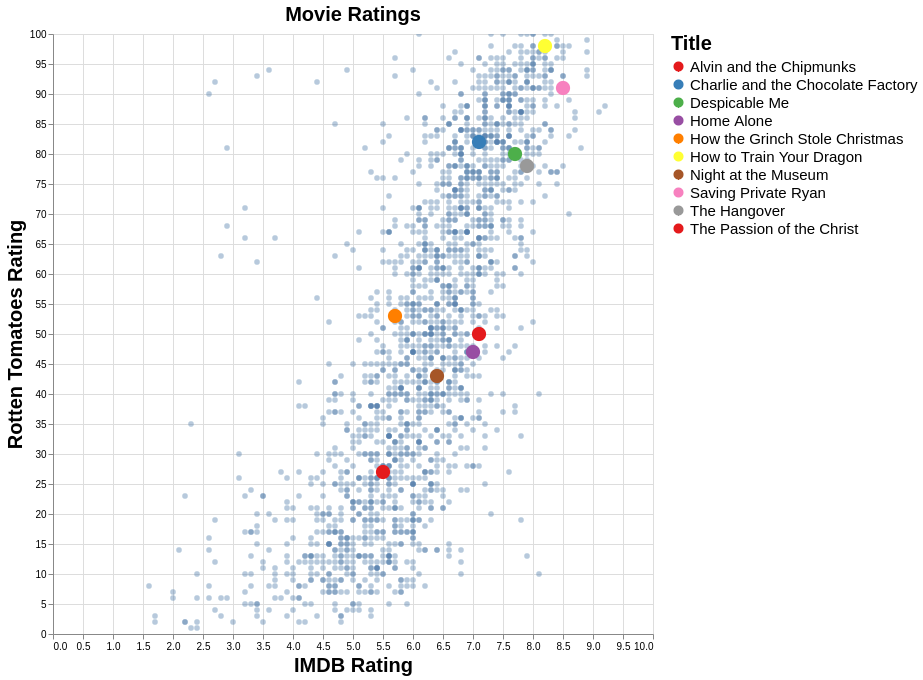

In [50]:
(p1 + p2).configure_axis(
    titleFontSize = 20,
    ).configure_title(
    fontSize = 20,
    ).configure_legend(titleFontSize = 20, labelFontSize = 15, labelLimit=1000)
